In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("10-dataset.csv")
data.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [5]:
colA = np.array(data.total_bill)
colB = np.array(data.tip)

In [13]:
mcolA = np.mat(colA)
mcolB = np.mat(colB)

In [43]:
m = np.shape(mcolB)[1]
one = np.ones((1,m) , dtype=int)
one

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1]])

In [14]:
x = np.hstack((one.T, mcolA.T))
x.shape

(244, 2)

In [47]:
y_pred = localWeightRegression(x , mcolB, 0.8)

In [46]:
def localWeightRegression(xmat , ymat , k):
    m , n= np.shape(xmat)
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = xmat[i]*localWeight(xmat[i], xmat ,ymat , k)
    return y_pred

In [45]:
def localWeight(point ,xmat, ymat , k ):
    wt = kernel(point , xmat , k)
    W = ((x.T*(wt*x)).I)*(x.T*wt*ymat.T)
    return W

In [44]:
def kernel(point , xmat ,k):
    m ,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point-x[j]
        weights[j,j] = np.exp(diff*diff.T/ (-2 * k**2))
    return weights

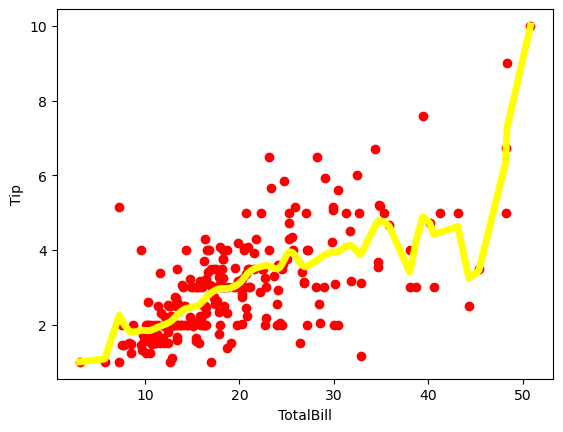

In [48]:
import matplotlib.pyplot as plt
xsort= x.copy()
xsort.sort(axis=0)
plt.scatter(colA , colB , color="red")
plt.plot(xsort[:,1], y_pred[x[:,1].argsort(0)] , color="yellow" , linewidth=5)
plt.xlabel("TotalBill")
plt.ylabel("Tip")
plt.show()